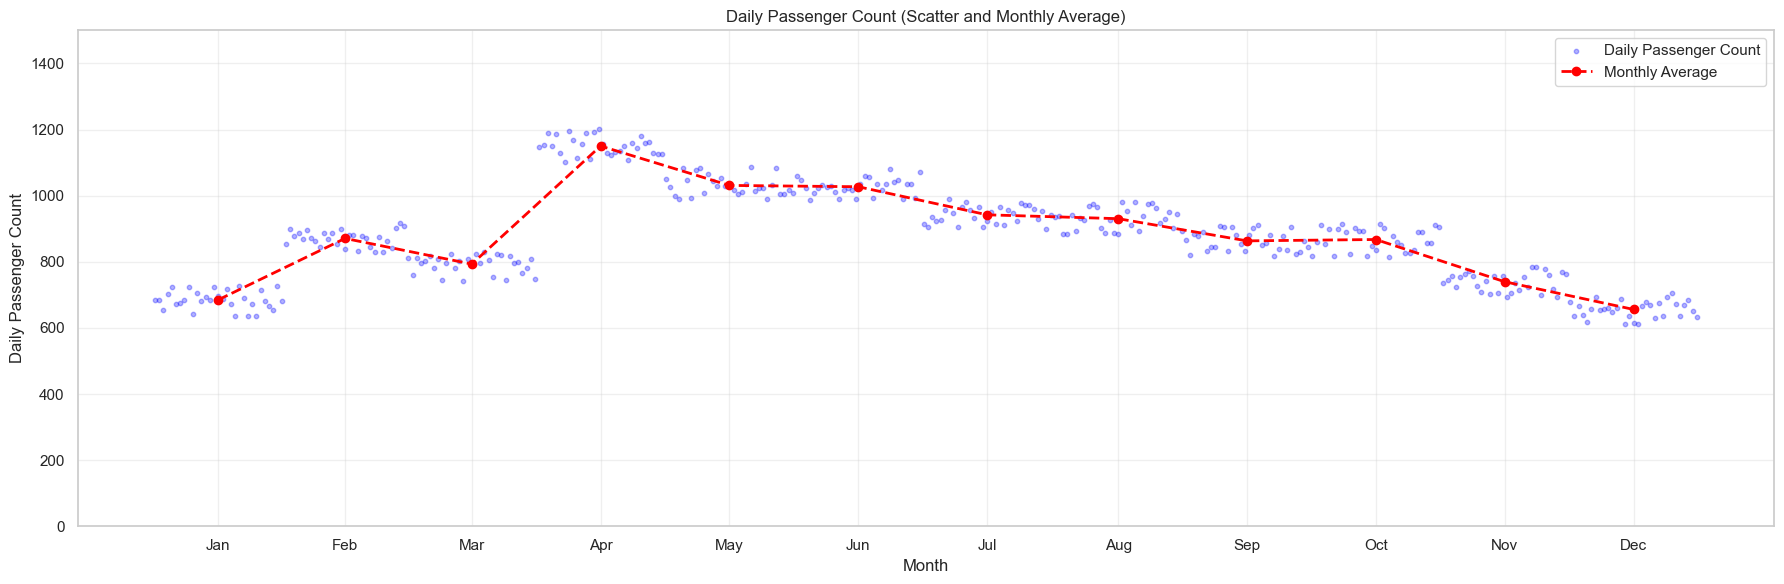

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("yolcu_hava_2024.csv")
df = df[df["istasyon_adi"] == "BESIKTAS"]  # Only Beşiktaş pier

df["tarih"] = pd.to_datetime(df["tarih"])
df["day"] = (df["tarih"] - pd.Timestamp("2024-01-01")).dt.days + 1
df["month"] = df["tarih"].dt.month

# Daily passenger scatter plot
plt.figure(figsize=(18, 6))
plt.scatter(df["day"], df["gunluk_yolcu"], alpha=0.3,
            s=10, color='blue', label="Daily Passenger Count")

# Plot monthly averages
monthly_avg = df.groupby("month")["gunluk_yolcu"].mean()
month_day_center = df.groupby("month")["day"].mean()  # midpoints of months
plt.plot(month_day_center, monthly_avg, color='red', linestyle='--',
         linewidth=2, marker='o', label="Monthly Average")

# Month names in English
month_names = ["Jan", "Feb", "Mar", "Apr", "May",
               "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_ticks = df.groupby("month")["day"].mean()

plt.xticks(month_ticks, month_names)
plt.ylim(0, 1500)
plt.xlabel("Month")
plt.ylabel("Daily Passenger Count")
plt.title("Daily Passenger Count (Scatter and Monthly Average)")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()


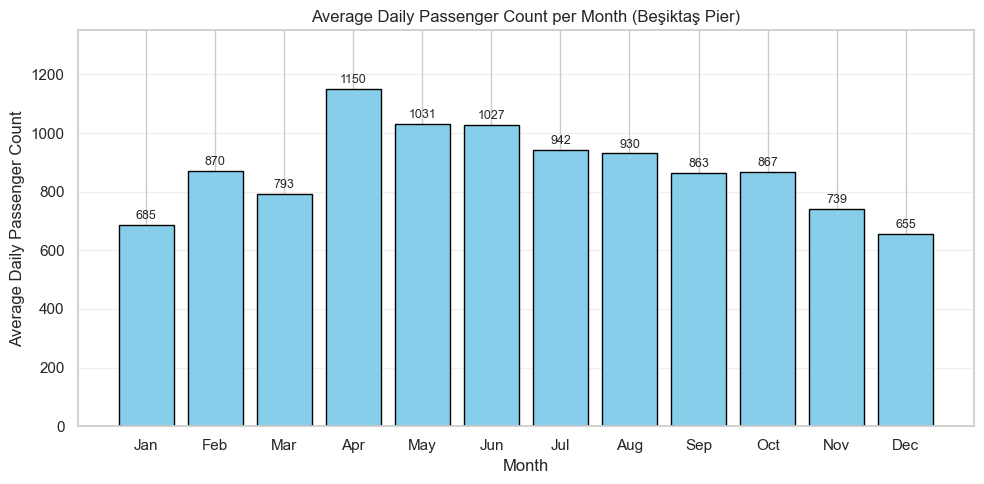

In [50]:
import matplotlib.pyplot as plt

# Aylık ortalama günlük yolcu sayısını hesapla
monthly_avg = besiktas_df.groupby("ay")["gunluk_yolcu"].mean()

# Bar chart çiz
plt.figure(figsize=(10, 5))
bars = plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue', edgecolor='black')

# Her sütunun üstüne değeri yaz
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, f"{int(yval)}",
             ha='center', va='bottom', fontsize=9)

# Grafik başlık ve eksen etiketleri
plt.title("Average Daily Passenger Count per Month (Beşiktaş Pier)")
plt.xlabel("Month")
plt.ylabel("Average Daily Passenger Count")

# Ay isimlerini ekle
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

# Y ekseni limiti
plt.ylim(0, max(monthly_avg.values) + 200)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


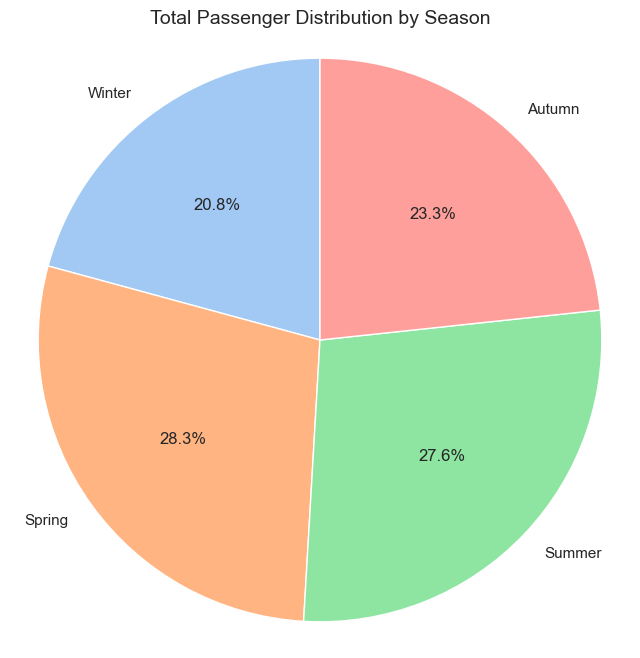

In [49]:
# Season function
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["ay"].apply(get_season)

# Total passenger count by season
season_total = df.groupby("season")["gunluk_yolcu"].sum().reindex([
    "Winter", "Spring", "Summer", "Autumn"])

# Pie Chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")
plt.pie(season_total, labels=season_total.index,
        autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Total Passenger Distribution by Season", fontsize=14)
plt.axis('equal')  # Keeps it a circle
plt.show()


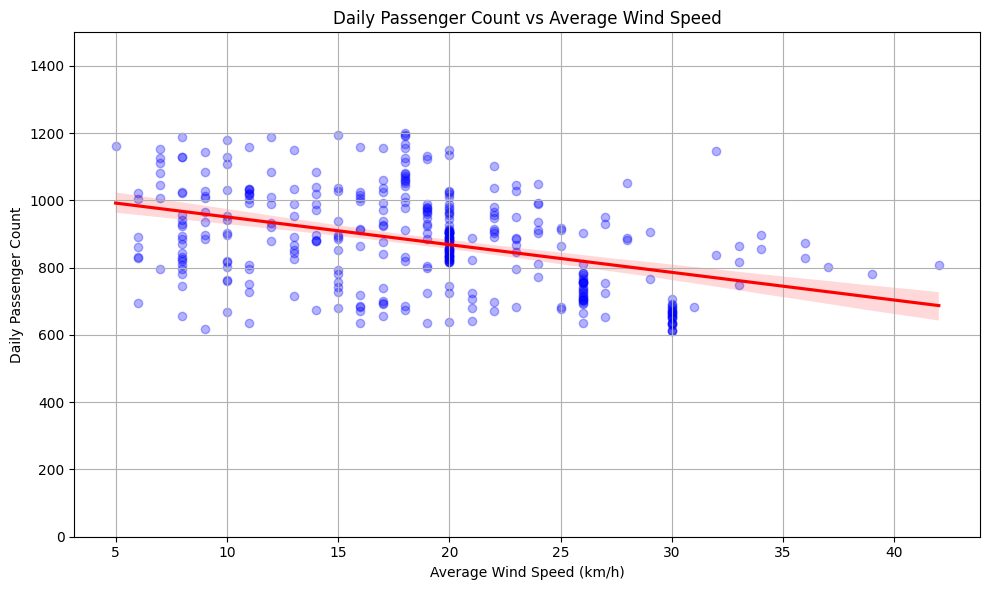

In [22]:
# Wind Speed
df_clean = df[["gunluk_yolcu", "ruzgar_hizi"]].dropna()

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x="ruzgar_hizi",
    y="gunluk_yolcu",
    scatter_kws={"alpha": 0.3, "color": "blue"},
    line_kws={"color": "red"}
)
plt.title("Daily Passenger Count vs Average Wind Speed")
plt.xlabel("Average Wind Speed (km/h)")
plt.ylabel("Daily Passenger Count")
plt.grid(True)
plt.ylim(0, 1500)
plt.tight_layout()
plt.show()


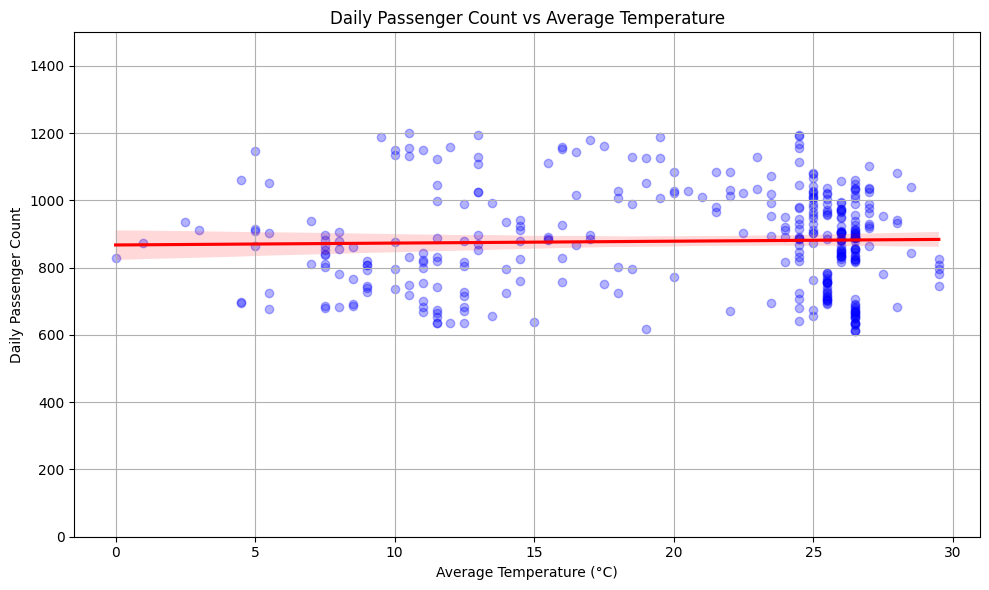

In [23]:
df["average_temperature"] = (df["maksimum_sicaklik"] + df["minimum_sicaklik"]) / 2

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x="average_temperature",
    y="gunluk_yolcu",
    scatter_kws={"alpha": 0.3, "color": "blue"},
    line_kws={"color": "red"}
)
plt.title("Daily Passenger Count vs Average Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Daily Passenger Count")
plt.ylim(0, 1500)
plt.grid(True)
plt.tight_layout()
plt.show()


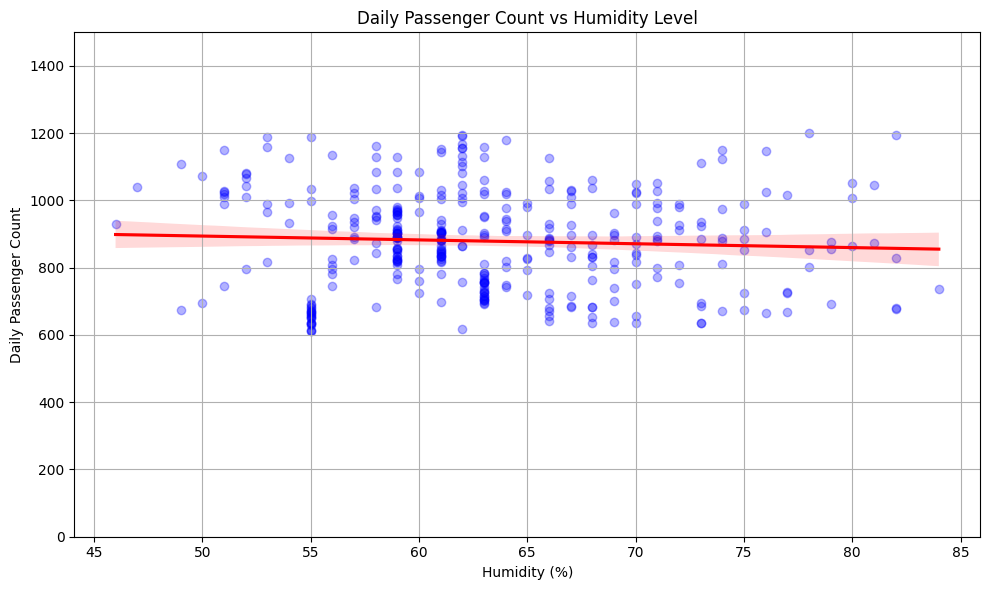

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x="nem", y="gunluk_yolcu",
    scatter_kws={"alpha": 0.3, "color": "blue"},
    line_kws={"color": "red"}
)

plt.title("Daily Passenger Count vs Humidity Level")
plt.xlabel("Humidity (%)")
plt.ylabel("Daily Passenger Count")
plt.ylim(0, 1500)
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_51239/3876460810.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=besiktas_df, x="donem", y="gunluk_yolcu", palette="pastel")


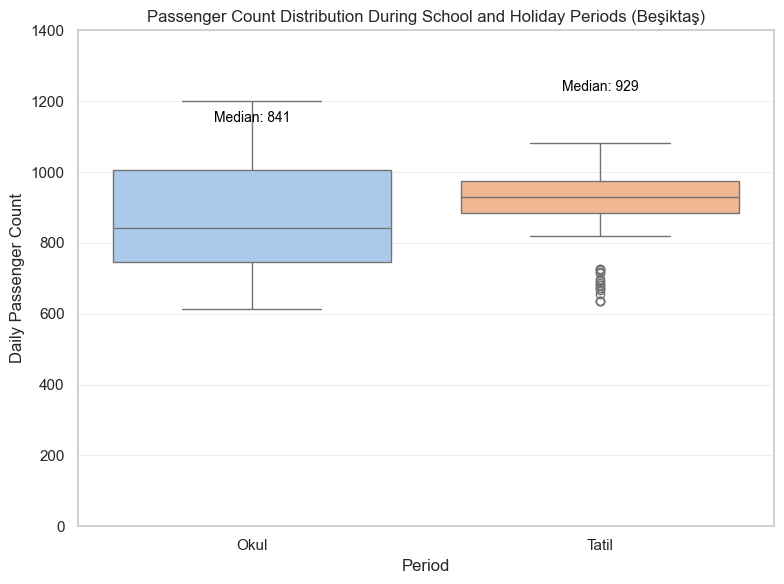

In [44]:
# Eğer kernel sıfırlandıysa yeniden veriyi hazırlayalım
import pandas as pd

# Dosyayı tekrar yükleyelim
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Donem sütununu sayısallaştır ve etiketle
besiktas_df["donem_numeric"] = besiktas_df["donem"].map({"Okul": 1, "Tatil": 0})
besiktas_df["donem_label"] = besiktas_df["donem_numeric"].map({0: "Tatil", 1: "Okul"})

# Boxplot'u tekrar çiz
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=besiktas_df, x="donem", y="gunluk_yolcu", palette="pastel")

grouped_median = besiktas_df.groupby("donem")["gunluk_yolcu"].median()
for i, median_val in enumerate(grouped_median):
    ax.text(i, median_val + 300, f"Median: {int(median_val)}",
            horizontalalignment='center', color='black', fontsize=10)

plt.title("Passenger Count Distribution During School and Holiday Periods (Beşiktaş)")
plt.xlabel("Period")
plt.ylabel("Daily Passenger Count")
plt.ylim(0, 1400)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [46]:
from scipy.stats import ttest_ind
import pandas as pd

# Load the dataset and filter for Beşiktaş pier
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Map 'donem' column to numeric: Holiday = 0, School = 1
besiktas_df["donem_numeric"] = besiktas_df["donem"].map({"Tatil": 0, "Okul": 1})

# Separate passenger counts
holiday_passengers = besiktas_df[besiktas_df["donem_numeric"] == 0]["gunluk_yolcu"]
school_passengers = besiktas_df[besiktas_df["donem_numeric"] == 1]["gunluk_yolcu"]

# Perform independent two-sample t-test
t_stat, p_val = ttest_ind(holiday_passengers, school_passengers, equal_var=False)

# One-tailed p-value (testing if holiday > school)
p_one_tailed = p_val / 2 if t_stat > 0 else 1 - (p_val / 2)

# Decision based on alpha = 0.05
alpha = 0.05
if p_one_tailed < alpha:
    print(f"H0 is rejected. p-value = {p_one_tailed:.4f}")
    print("Conclusion: The average number of daily passengers is significantly higher during holidays.")
else:
    print(f"H0 is not rejected. p-value = {p_one_tailed:.4f}")
    print("Conclusion: There is no statistically significant difference between holidays and school terms.")


H0 is rejected. p-value = 0.0021
Conclusion: The average number of daily passengers is significantly higher during holidays.


In [33]:
from scipy.stats import pearsonr
import pandas as pd

# Veri yükleme
df = pd.read_csv("yolcu_hava_2024.csv")

# Beşiktaş iskelesi için filtreleme
df_besiktas = df[df["istasyon_adi"] == "BESIKTAS"]

# Pearson korelasyon katsayısı ve p-değeri hesaplama
corr, p_value = pearsonr(df_besiktas["ruzgar_hizi"], df_besiktas["gunluk_yolcu"])

print(f"Pearson Korelasyon Katsayısı: {corr}")
print(f"P-değeri: {p_value}")


Pearson Korelasyon Katsayısı: -0.40563644983610064
P-değeri: 6.273449728041423e-16


In [36]:
# Ortalama sıcaklık hesaplamak
df_besiktas["ortalama_sicaklik"] = (df_besiktas["maksimum_sicaklik"] + df_besiktas["minimum_sicaklik"]) / 2

# Nem ile Günlük Yolcu Korelasyonu ve p-değeri
corr_nem, p_value_nem = pearsonr(df_besiktas["nem"], df_besiktas["gunluk_yolcu"])
print(f"Nem - Günlük Yolcu Korelasyonu: {corr_nem}, P-değeri: {p_value_nem}")

# Ortalama Sıcaklık ile Günlük Yolcu Korelasyonu ve p-değeri
corr_sicaklik, p_value_sicaklik = pearsonr(df_besiktas["ortalama_sicaklik"], df_besiktas["gunluk_yolcu"])
print(f"Sıcaklık - Günlük Yolcu Korelasyonu: {corr_sicaklik}, P-değeri: {p_value_sicaklik}")

# Okul ve Tatil Dönemi ile Günlük Yolcu Korelasyonu ve p-değeri
# Dönem: Okul dönemi ve tatil dönemi değişkenini sayısal olarak kodlayalım (0: Tatil, 1: Okul)
df_besiktas["donem_num"] = df_besiktas["donem"].apply(lambda x: 0 if x == "Tatil" else 1)

corr_donem, p_value_donem = pearsonr(df_besiktas["donem_num"], df_besiktas["gunluk_yolcu"])
print(f"Okul-Tatil Dönemi - Günlük Yolcu Korelasyonu: {corr_donem}, P-değeri: {p_value_donem}")


Nem - Günlük Yolcu Korelasyonu: -0.057114049975234234, P-değeri: 0.27579760647708207
Sıcaklık - Günlük Yolcu Korelasyonu: 0.028640632178671063, P-değeri: 0.5849522982639406
Okul-Tatil Dönemi - Günlük Yolcu Korelasyonu: -0.13092433889254862, P-değeri: 0.012177381703400596


/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_51239/991111485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_besiktas["ortalama_sicaklik"] = (df_besiktas["maksimum_sicaklik"] + df_besiktas["minimum_sicaklik"]) / 2
/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_51239/991111485.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_besiktas["donem_num"] = df_besiktas["donem"].apply(lambda x: 0 if x == "Tatil" else 1)


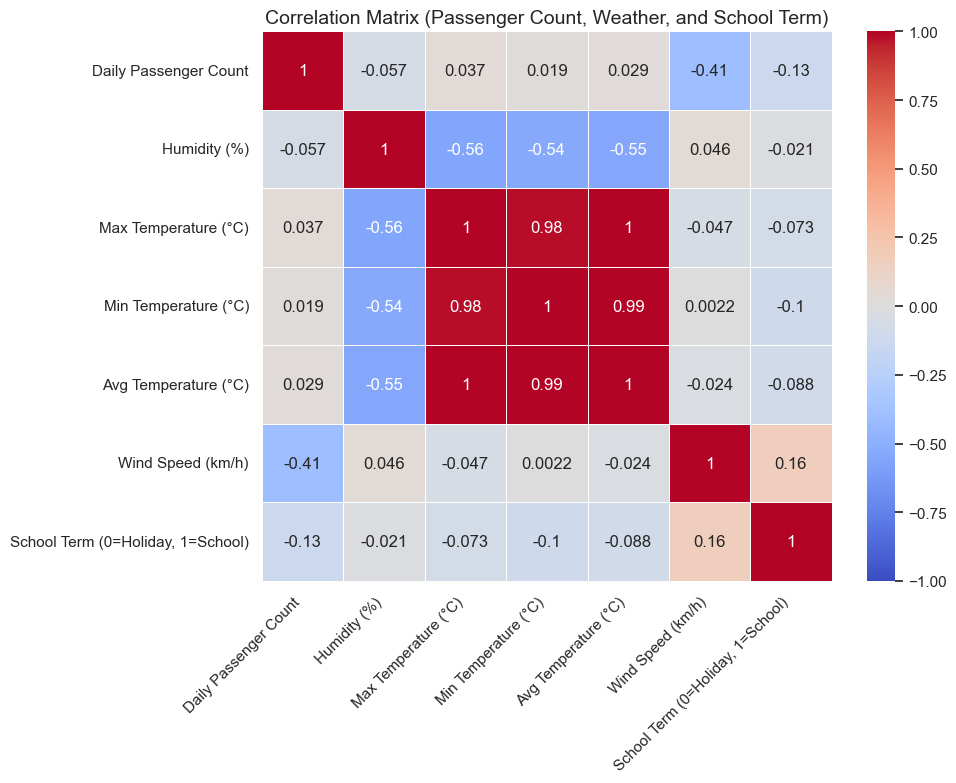

In [52]:
# Yeni sütunlar oluştur
besiktas_df["donem_numeric"] = besiktas_df["donem"].map({"Tatil": 0, "Okul": 1})
besiktas_df["ortalama_sicaklik"] = (
    besiktas_df["maksimum_sicaklik"] + besiktas_df["minimum_sicaklik"]
) / 2

# Korelasyon matrisi için kullanılacak sütunlar
heatmap_df = besiktas_df[[
    "gunluk_yolcu", "nem", "maksimum_sicaklik",
    "minimum_sicaklik", "ortalama_sicaklik",
    "ruzgar_hizi", "donem_numeric"
]]

# İngilizce isim eşlemesi
column_names = {
    "gunluk_yolcu": "Daily Passenger Count",
    "nem": "Humidity (%)",
    "maksimum_sicaklik": "Max Temperature (°C)",
    "minimum_sicaklik": "Min Temperature (°C)",
    "ortalama_sicaklik": "Avg Temperature (°C)",
    "ruzgar_hizi": "Wind Speed (km/h)",
    "donem_numeric": "School Term (0=Holiday, 1=School)"
}

# Korelasyon matrisi oluştur ve başlıkları İngilizce yap
corr_matrix = heatmap_df.corr()
corr_matrix.columns = [column_names[col] for col in heatmap_df.columns]
corr_matrix.index = [column_names[col] for col in heatmap_df.columns]

# Isı haritası çizimi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (Passenger Count, Weather, and School Term)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_51239/404162722.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=besiktas_df, x="day_of_week", y="gunluk_yolcu", hue="donem", ci="sd", palette="Set2")


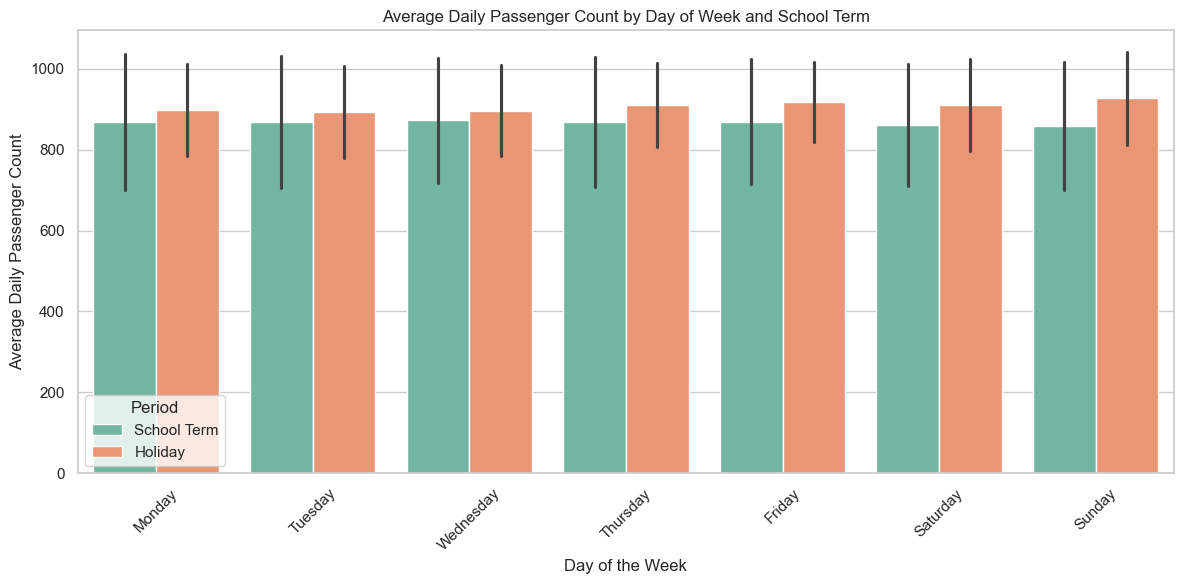

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi oku ve filtrele
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Gerekli sütunları oluştur
besiktas_df["tarih"] = pd.to_datetime(besiktas_df["tarih"])
besiktas_df["day_of_week"] = besiktas_df["tarih"].dt.day_name()  # Monday, Tuesday vs.
besiktas_df["donem"] = besiktas_df["donem"].map({"Tatil": "Holiday", "Okul": "School Term"})

# Multivariate bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=besiktas_df, x="day_of_week", y="gunluk_yolcu", hue="donem", ci="sd", palette="Set2")

plt.title("Average Daily Passenger Count by Day of Week and School Term")
plt.xlabel("Day of the Week")
plt.ylabel("Average Daily Passenger Count")
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.tight_layout()
plt.show()


/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_51239/4293803568.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


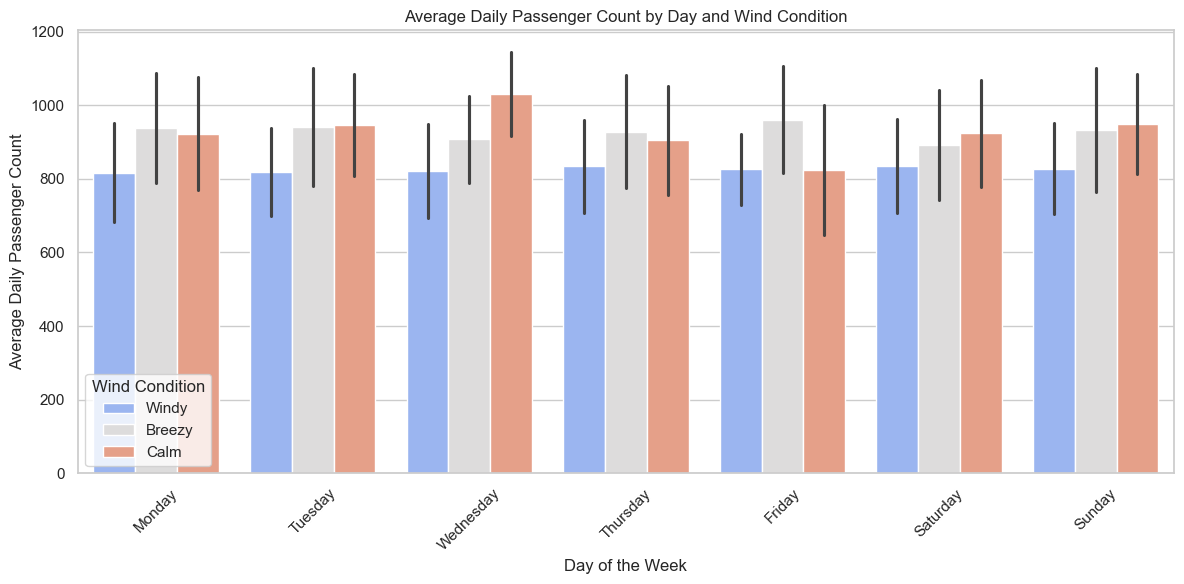

In [56]:
# Rüzgar hızını kategoriye çevir
def wind_category(speed):
    if speed < 10:
        return "Calm"
    elif speed < 20:
        return "Breezy"
    else:
        return "Windy"

besiktas_df["wind_condition"] = besiktas_df["ruzgar_hizi"].apply(wind_category)

# Tarihi haftanın gününe çevir
besiktas_df["tarih"] = pd.to_datetime(besiktas_df["tarih"])
besiktas_df["day_of_week"] = besiktas_df["tarih"].dt.day_name()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=besiktas_df,
    x="day_of_week",
    y="gunluk_yolcu",
    hue="wind_condition",
    ci="sd",
    palette="coolwarm"
)

plt.title("Average Daily Passenger Count by Day and Wind Condition")
plt.xlabel("Day of the Week")
plt.ylabel("Average Daily Passenger Count")
plt.xticks(rotation=45)
plt.legend(title="Wind Condition")
plt.tight_layout()
plt.show()
